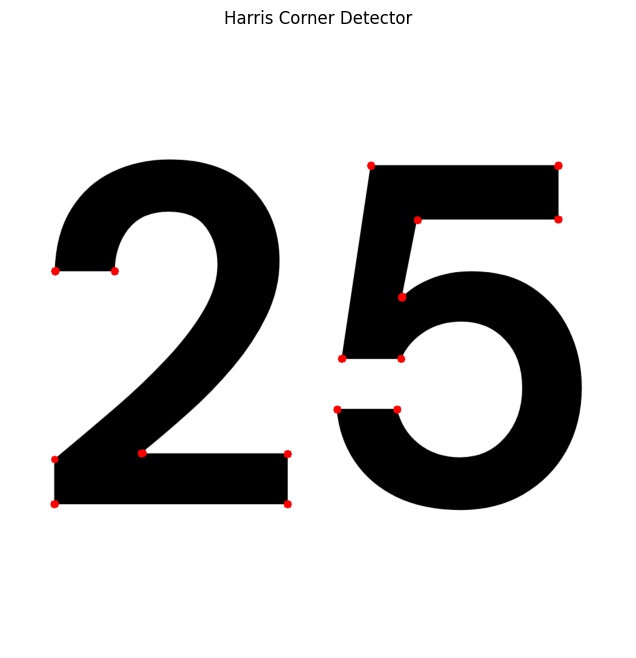

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image, block_size=2, ksize=3, k=0.04, threshold=0.01):

    Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)

    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    kernel_size = (block_size * 2 + 1)
    Sxx = cv2.GaussianBlur(Ixx, (kernel_size, kernel_size), sigmaX=1)
    Syy = cv2.GaussianBlur(Iyy, (kernel_size, kernel_size), sigmaX=1)
    Sxy = cv2.GaussianBlur(Ixy, (kernel_size, kernel_size), sigmaX=1)

    det_M = (Sxx * Syy) - (Sxy ** 2)
    trace_M = Sxx + Syy
    R = det_M - k * (trace_M ** 2)

    corners = np.zeros_like(image)
    max_R = R.max()
    corners[R > threshold * max_R] = 255

    return corners, R

image = cv2.imread("/content/25.jpg", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found.")
    exit()

corners, response = harris_corner_detection(image)

image_with_corners = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

for y in range(dst.shape[0]):
    for x in range(dst.shape[1]):
        if dst[y, x] > threshold:
            cv2.circle(image_with_corners, (x, y), radius=5, color=(0, 0, 255), thickness=-1)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detector")
plt.axis("off")
plt.show()
